# Nontwist Tori

In [1]:
# %% Import JAX and enable 64-bit precision
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import jax.tree_util
import matplotlib as mpl

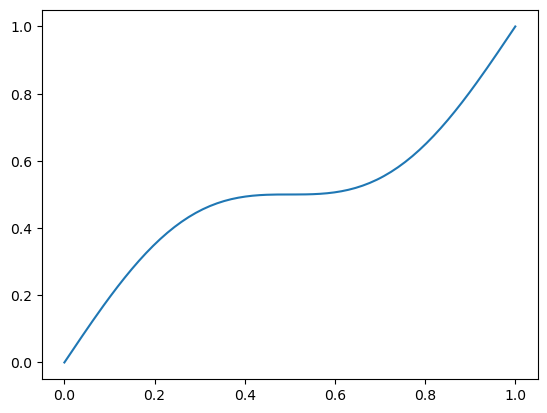

In [2]:
# %% Twist function

yplot = np.linspace(0, 1, 128)

plt.figure()
plt.plot(yplot, yplot + (0.5/jnp.pi)*np.sin(2*np.pi*(yplot)))

In [14]:
1 / (2*np.pi)

0.15915494309189535

In [27]:
@jax.jit
def map(xy, t, params):
    a, b, y0 = params
    x, y = xy
    ynew = y - b * jnp.sin(2 * jnp.pi * x)
    xnew = x + ynew + a * jnp.sin(2 * jnp.pi * (ynew - y0))
    return ((xnew, ynew), None)


a_vals = jnp.linspace(-0.5, 0.5, 96)
b_vals = jnp.linspace(0, 1.0, 128)
c_vals = jnp.array([0.0, (1.0+jnp.sqrt(5))/2])

abc_grid = jnp.array(jnp.meshgrid(a_vals, b_vals, c_vals, indexing='ij'))
abc_vals = jnp.reshape(abc_grid.T, (-1, 3))

def compute_transport(params):
    n_particles = 256
    x0 = jnp.linspace(0,1,n_particles)
    y0 = jnp.linspace(0,1,n_particles)

    map_params = jax.tree_util.Partial(map, params=params)
    vals = jax.lax.scan(map_params, (x0, y0), None, length=1024)
    xy_map = jnp.array(vals[0])

    return jnp.std(xy_map[1,:])

transport_vals = jax.vmap(compute_transport)(abc_vals)

In [30]:
abc_grid.shape

(3, 16, 24, 2)

In [31]:
abc_grid.T.shape

(2, 24, 16, 3)

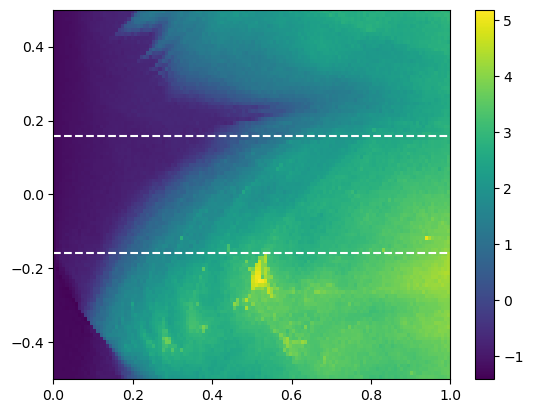

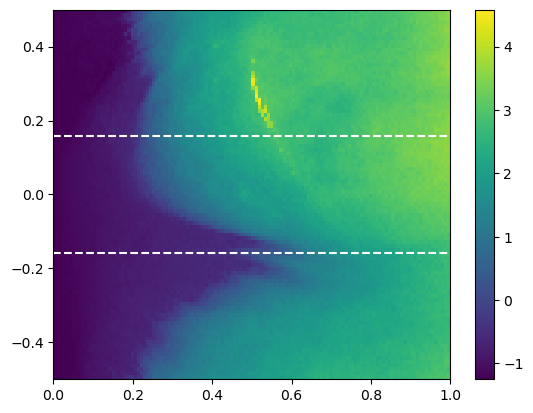

In [28]:

tgrid = transport_vals.reshape((len(c_vals), len(b_vals), len(a_vals))).T

plt.figure()
plt.imshow(jnp.log(tgrid[:,:,0]), origin='lower', extent=(0.0,1.0,-0.5,0.5), aspect='auto')
plt.axhline(1/ (2*np.pi), color='w', linestyle='--')
plt.axhline(-1/ (2*np.pi), color='w', linestyle='--')
plt.colorbar()

plt.figure()
plt.imshow(jnp.log(tgrid[:,:,1]), origin='lower', extent=(0.0,1.0,-0.5,0.5), aspect='auto')
plt.axhline(1/ (2*np.pi), color='w', linestyle='--')
plt.axhline(-1/ (2*np.pi), color='w', linestyle='--')
plt.colorbar()

In [25]:
tgrid.shape

(16, 24, 2)

In [ ]:

for j in range(len(a_vals)):
    map_params = jax.tree_util.Partial(map, params=(a_vals[j], 0.3))

    n_particles = 256
    x0 = jnp.linspace(0,1,n_particles)
    y0 = jnp.linspace(0,1,n_particles)

    vals = jax.lax.scan(map_params, (x0, y0), None, length=1024)
    xy_map = jnp.array(vals[1])
    y_max.append(jnp.std(xy_map[1,:,:]))

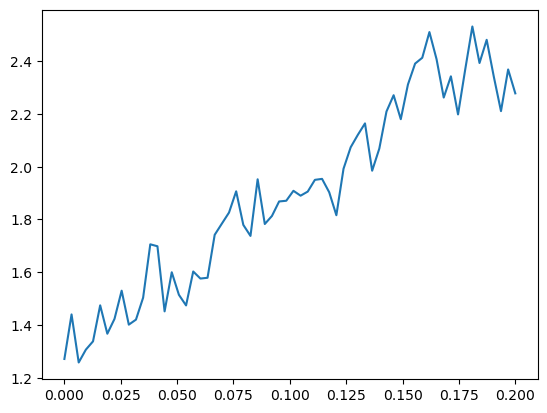

In [197]:
plt.figure()
plt.plot(a_vals, y_max)

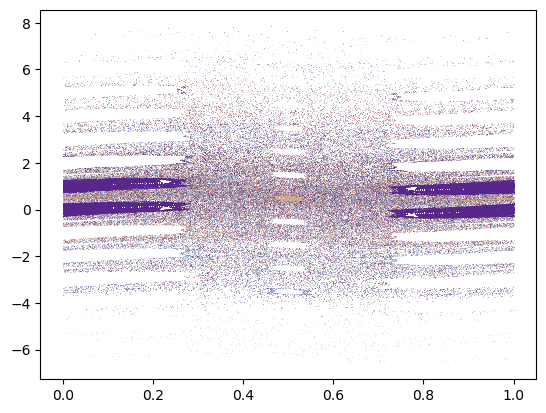

In [170]:
xy_map = jnp.array(vals[1])

rotation_number = jnp.sum(weight[:-1,None] * jnp.diff(xy_map[0,:,:], axis=0), axis=0) / jnp.sum(weight[:-1])
y_avg = jnp.sum(weight[:-1,None] * xy_map[1,:-1,:], axis=0) / jnp.sum(weight[:-1])

plt.figure()
#plt.axis('square')
#plt.xlim(0,1)
#plt.ylim(0,1)
for k in range(n_particles):
    plt.scatter(jnp.mod(xy_map[0,:,k], 1), xy_map[1,:,k], s=(72.0/100.0)**2, marker='.', lw=0, color=mpl.cm.twilight((rotation_number[k] - (1 + jnp.sqrt(5)) / 2) % 1))

(array([  819.,  1395.,  1813.,  2304.,  2609.,  2874.,  3125.,  4260.,
         5047.,  8396., 11863.,  8020.,  7901.,  8327.,  8014.,  8303.,
         9277., 10174.,  7189.,  6293.,  5950.,  7392.,  6338.,  7118.,
         6134.,  5574.,  5205.,  4991.,  4865.,  4897.,  4409.,  3808.,
         3633.,  3815.,  3825.,  3956.,  4986.,  6490.,  4610.,  3320.,
         3561.,  3529.,  3402.,  3122.,  3729.,  4424.,  3487.,  2358.,
         2075.,  1772.,  1778.,  1651.,  1669.,  1289.,  1117.,   843.,
          781.,   577.,   454.,   403.,   392.,   248.,    83.,    81.]),
 array([-0.36224645, -0.32626372, -0.29028098, -0.25429824, -0.21831551,
        -0.18233277, -0.14635004, -0.1103673 , -0.07438457, -0.03840183,
        -0.00241909,  0.03356364,  0.06954638,  0.10552911,  0.14151185,
         0.17749459,  0.21347732,  0.24946006,  0.28544279,  0.32142553,
         0.35740827,  0.393391  ,  0.42937374,  0.46535647,  0.50133921,
         0.53732195,  0.57330468,  0.60928742,  0.6452701

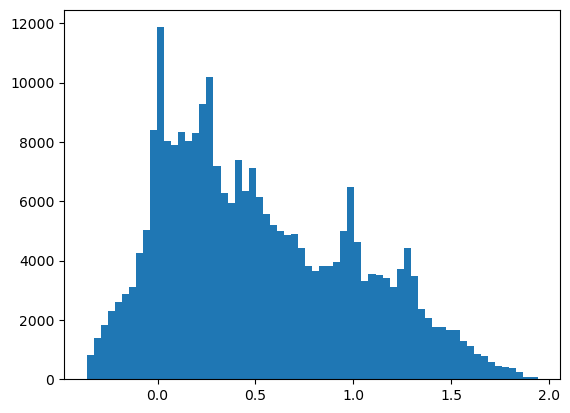

In [155]:
plt.figure()
plt.hist(jnp.ravel(xy_map[1,:,:]), bins=64)

In [ ]:
s = jnp.linspace(0, 1, xy_map.shape[1])

weight = jnp.exp(-1.0 / (s * (1.0 - s)))




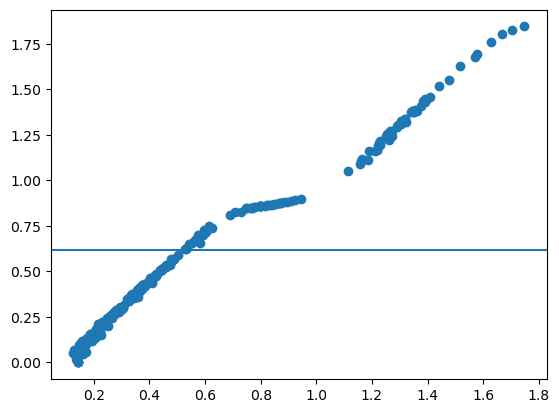

In [150]:
plt.figure()
plt.scatter(y_avg, rotation_number)
plt.axhline((1 + np.sqrt(5)) / 2 - 1)

In [120]:
(1 - np.sqrt(5))/2

np.float64(-0.6180339887498949)